In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.datasets import load_digits
import shap
import matplotlib.pyplot as plt 
%matplotlib inline  
import tensorflow as tf# tensor flow


In [2]:
tf.__version__

'2.5.0'

## Deep Learning Introduction
We want to find mappings to our inputs to some outputs(some neurons) e.g.<br>
![alt text](images/deep_learning.jpeg) <br>
- each of those connections have their own **unique weight**
- 1 Hidden layer $\rightarrow$ **Neuaral Network**
- 2 $\leq$ x Hidden layer $\rightarrow$ **Deep Neuaral Network** <br>
![alt text](images/deep_learning2.png) <br>
- Outputs also have their **Sinusoidal Activation Function as well**, and adding all of them = 1
- We take the arg max of those probabilities and that is the output


# Load Digits Dataset (MNIST)
- Data: 28*28 pxls represented as images of numbers
    - Grayscale image: input 0-255 (white-black)
- Target: number 0-9

In [3]:
# load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

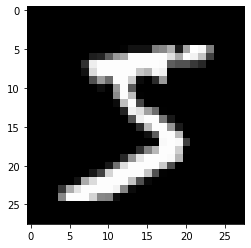

In [4]:
plt.imshow(x_train[0], cmap="gray")

In [5]:
# Normalize (puts values to 0-1) which makes
# the neural network easier to learn
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
print("x_train: ", np.shape(x_train))
print("y_train: ", np.shape(y_train))
print("x_test: ", np.shape(x_test))
print("y_test: ", np.shape(y_test))

x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [22]:
img_rows, img_cols = 28, 28
if tf.keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [24]:
# 2 types of deep learning models
# sequential is most common one
seq_model = tf.keras.models.Sequential()
# Add our flatten input layer
# seq_model.add(tf.keras.layers.Flatten())
seq_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
# Dense(#neurons in layer, activation f(x))
# Added two hidden layers
seq_model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
seq_model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
# Add our output layer
seq_model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

#a NN does not aim to maximize accuracy
# NN alwasy tries to minimize loss (degree of error)
# so the way to calculate loss impacts greatly the 
# NN performance
seq_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
seq_model.fit(x_train, y_train, epochs=3)

Epoch 1/3


ValueError: in user code:

    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:796 train_step
        loss = self.compiled_loss(
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/losses.py:1712 sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:4979 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/nn_ops.py:4228 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /Users/DavidGtz/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/nn_ops.py:4133 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (32,)) should equal the shape of logits except for the last dimension (received (21632, 10)).


In [9]:
val_loss, val_acc = seq_model.evaluate(x_test, y_test)
val_loss, val_acc

313/313 [==============================] - 1s 1ms/step - loss: 0.0885 - accuracy: 0.9712


(0.08850783854722977, 0.9711999893188477)

Consider rewriting this model with the Functional API.
Model predicted:  5
Actual number:


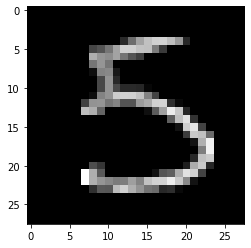

In [10]:
# seq_model.save('epic_num_reader.model')
# load_model = tf.keras.models.load_model('epic_num_reader.model')
example = 15
pred = seq_model.predict([x_test])
# argmax because it is a probability distribution
print("Model predicted: ",np.argmax(pred[example]))
print("Actual number:")
plt.imshow(x_test[example], cmap="gray")

In [11]:
# SHAP explanation
background = x_train[:50] #first examples
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
explainer = shap.DeepExplainer(seq_model, background)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [12]:
shap_values = explainer.shap_values(x_test[:5])

Consider rewriting this model with the Functional API.


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       

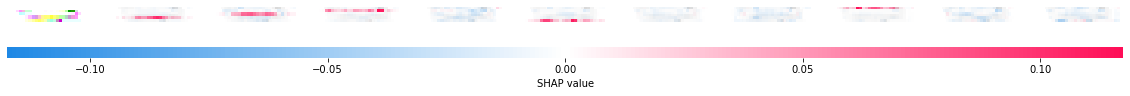

In [15]:
shap.image_plot(shap_values, -x_test[1:5])

In [104]:
print("SHAP version is:", shap.__version__)
print("Tensorflow version is:", tf.__version__)

SHAP version is: 0.40.0
Tensorflow version is: 2.8.0


# Load Digits Dataset (sklearn)
- Data: 8*8 pxls represented as images of numbers
    - Grayscale image: input 0-16 (white-black)
- Target: number 0-9
- Samples: 1797 ($\approx$180 samples per class)

In [6]:
X, y = load_digits(return_X_y=True, as_frame=True)

In [60]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


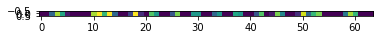

In [58]:
X[0:1].to_numpy()
plt.imshow(X[0:1].to_numpy())